In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)

In [65]:
α = 0.8
N = 1000
β = 1-0.01 # s = 0.1
# def β(A):
#     return b * np.exp( - (A - Ahat)**2 / (2*J) )
# b, J = 1, 1

tmax = 1000

In [92]:
def simulation(N, α, β, tmax):
    A = np.empty((tmax, N))
    A[:,:] = np.nan
    A[0] = np.random.choice([0, 1], N, p=[0.5, 0.5]) # Ahat = 1, A = 0
    
    for t in range(1, tmax):
        X = A[t-1].sum() # number of role models with trait Ahat
        if X == N or X == 0:
            A[t:] = X == N
            break
        for i in range(N):        
            KiA = i - A[t,:i].sum() # number of copiers that already chose A
            # assert KiA == (A[t]==0).sum(), (KiA, (A[t]==0).sum())
            GiA = (α * (N-X) * β + (1-α) * KiA) / (α * (N-X) * β + α*X + (1-α) * i) # eq 11
            A[t,i] = np.random.binomial(1, 1-GiA)
    return A.mean(axis=1)

In [93]:
p1 = simulation(N=N, α=1, β=β, tmax=tmax)
p08 = simulation(N=N, α=0.8, β=β, tmax=tmax)
p05 = simulation(N=N, α=0.5, β=β, tmax=tmax)
p02 = simulation(N=N, α=0.2, β=β, tmax=tmax)
p0 = simulation(N=N, α=1e-6, β=β, tmax=tmax)

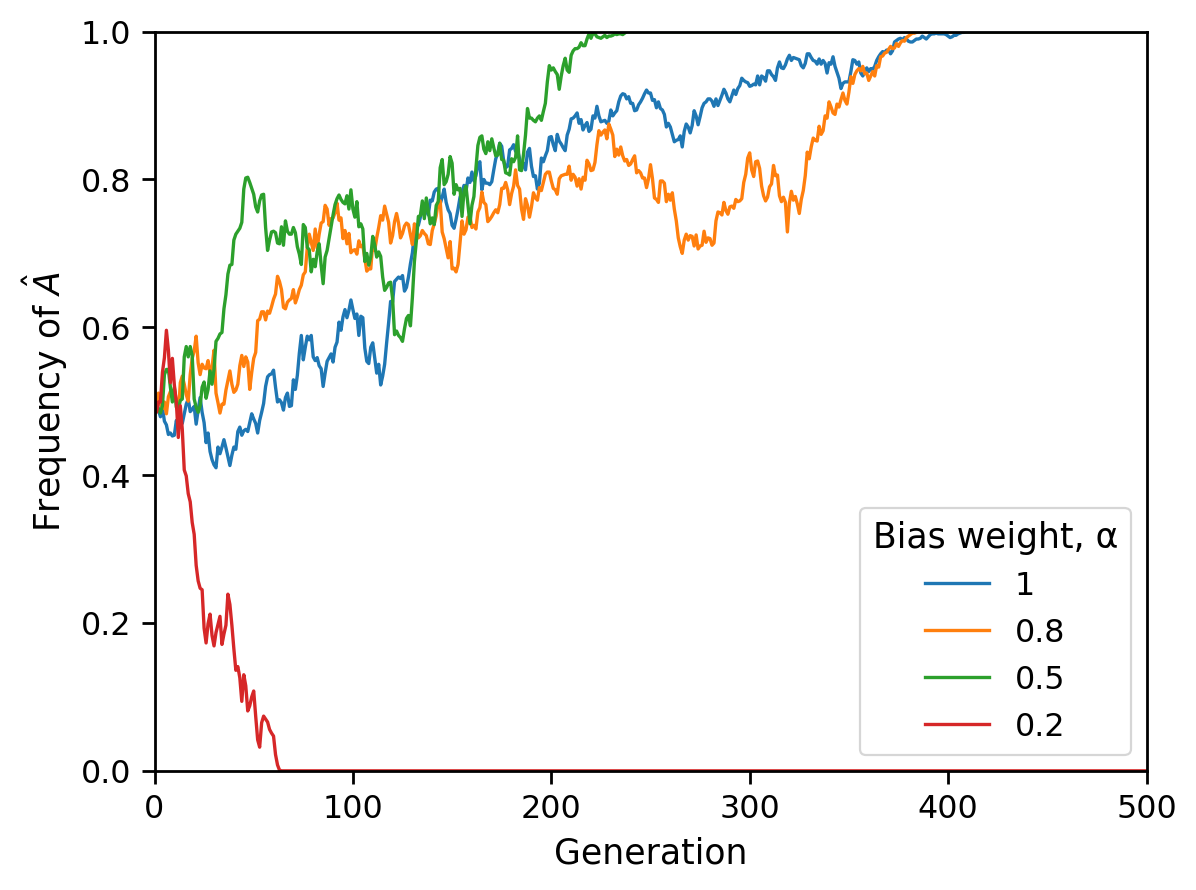

In [106]:
plt.plot(p1, label=1)
plt.plot(p08, label=0.8)
plt.plot(p05, label=0.5)
plt.plot(p02, label=0.2)
# plt.plot(p0, label=0)

plt.xlabel('Generation')
plt.ylabel('Frequency of $\hat{A}$')
plt.ylim(0, 1)
plt.xlim(0, 500)
plt.legend(title='Bias weight, α', loc='lower right')
plt.savefig('../ms/timeseries.pdf')

In [ ]:
# reps = 100
# p1 = np.array([simulation(N=N, α=1, β=β, tmax=tmax) for _ in range(reps)])
# p08 = np.array([simulation(N=N, α=0.8, β=β, tmax=tmax) for _ in range(reps)])
# p05 = np.array([simulation(N=N, α=0.5, β=β, tmax=tmax) for _ in range(reps)])
# p02 = np.array([simulation(N=N, α=0.2, β=β, tmax=tmax) for _ in range(reps)])
# p0 = np.array([simulation(N=N, α=1e-6, β=β, tmax=tmax) for _ in range(reps)])